# Linear Regression

### Importing packages

In [33]:
import pandas as pd
import seaborn as sns

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import statsmodels

In [36]:
from scipy.stats import iqr

In [37]:
import matplotlib as plt

### Loading Dataset

In [38]:
data = pd.read_csv('salary.csv')

In [39]:
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [40]:
data.isna().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

### Cleaning data

In [41]:
data =data.drop_duplicates()

In [42]:
data['salary'].fillna(data['salary'].mean(),inplace=True)

*Replacing the null value in salary with mean value*

### Correlation of features

In [179]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1,0.119946,0.623135,0.61058,0.407208,0.0445522,0.167129,0.701354,0.361447,-0.498485,-0.0696218
exprior,0.119946,1,-0.246549,-0.066403,-0.0350411,-0.0493727,0.264804,0.116596,0.0465577,-0.0483155,0.13238
yearsworked,0.623135,-0.246549,1,0.813471,-0.0708964,0.028421,-0.04049,0.746736,0.278963,-0.261379,0.0554682
yearsrank,0.61058,-0.066403,0.813471,1,-0.0269746,0.00651583,0.0070362,0.48521,0.237787,-0.263953,0.0356316
market,0.407208,-0.0350411,-0.0708964,-0.0269746,1,0.036408,0.0216917,-0.0133578,0.181201,-0.223827,-0.167068
degree,0.0445522,-0.0493727,0.028421,0.00651583,0.036408,1,-0.214717,0.0436796,0.061611,-0.0984242,0.0293106
otherqual,0.167129,0.264804,-0.04049,0.0070362,0.0216917,-0.214717,1,0.160311,0.0158332,-0.0766229,-0.0176389
position,0.701354,0.116596,0.746736,0.48521,-0.0133578,0.0436796,0.160311,1,0.318129,-0.288812,0.0297514
male,0.361447,0.0465577,0.278963,0.237787,0.181201,0.061611,0.0158332,0.318129,1,-0.128874,-0.622179
Field,-0.498485,-0.0483155,-0.261379,-0.263953,-0.223827,-0.0984242,-0.0766229,-0.288812,-0.128874,1,-0.000126793


*The highest correlation with regards to salary is position followed by yearsworked.*

### Splitting Data

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#### Let’s split this data into labels and features.

In [262]:
y = data.salary
x = data

#### Then, we split the data.

In [263]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [264]:
x_train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
419,34603.0,0,6,4,0.79,1,0,1,0,2,1
135,53543.0,9,4,4,1.17,1,0,2,1,1,1
386,33800.0,0,0,0,0.84,1,0,1,0,3,4
122,49667.0,0,12,4,0.88,1,0,2,1,2,0
22,34731.0,1,1,1,0.85,1,0,1,1,4,3


### Examining the training data

#### unique values

In [265]:
x_train.shape

(359, 11)

*The data has been examined at the beginning.There are no missing and null values in the training data set. The training data has 70% of the total Data set*

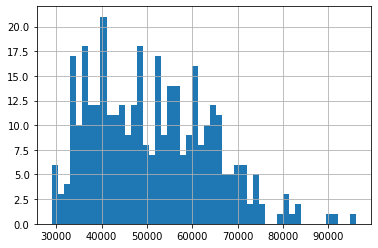

In [303]:
x_train['salary'].hist(bins=50)

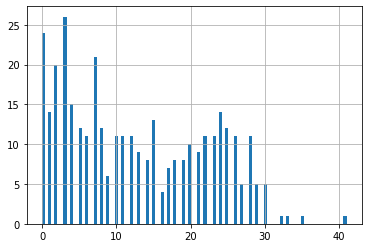

In [305]:
x_train['yearsworked'].hist(bins=100)

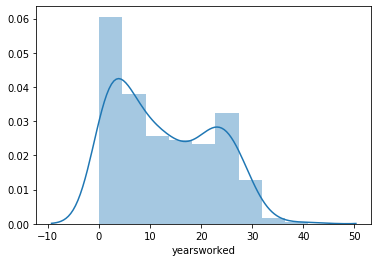

In [309]:
sns.distplot(x_train['yearsworked'])

#### extreme values

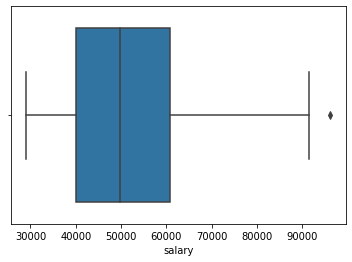

In [266]:
sns.boxplot(x_train['salary'])

*The boxplot above shows that there is one extreme value of salary in the training data set.*
*With that known, one can choose to remedy the outlier because it may cause the outlier can skew the results*

*The outlier is on the further right which is most likely to be on the 99 percentile.*

In [267]:
Q3 = x_train["salary"].quantile(0.9999999)

In [268]:
x_train[(x_train["salary"] > Q3)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


### The scatter plot showing the relationship between salaries and years worked

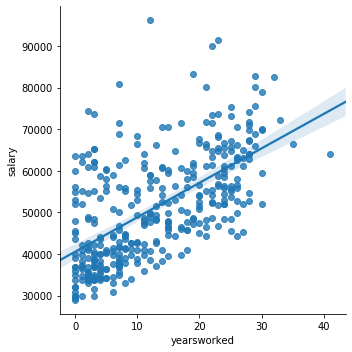

In [269]:
sns.lmplot(x='yearsworked',y='salary',data=x_train)

*There is a positive relationship between years worked and salaries earned.*

In [271]:
IQR =Q3 -Q1

NameError: name 'Q1' is not defined

In [272]:
a=Q1 - (1.5*IQR)

NameError: name 'Q1' is not defined

In [273]:
a

NameError: name 'a' is not defined

In [274]:
b=Q3 +(1.5*IQR)

NameError: name 'IQR' is not defined

In [275]:
df = x_train.query('salary > a & salary < b')

UndefinedVariableError: name 'a' is not defined

In [276]:
x_train[x_train['salary'] > b]

NameError: name 'b' is not defined

In [277]:
x_train[x_train['salary'] <a]

NameError: name 'a' is not defined

## Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

In [278]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
model1 = smf.ols(formula='salary ~ yearsworked', data=x_train).fit()

In [279]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.27e-37
Time:                        11:57:23   Log-Likelihood:                -3825.5
No. Observations:                 359   AIC:                             7655.
Df Residuals:                     357   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.058e+04    910.788     44.553      0.000    3.88e+04    4.24e+04
yearsworked   827.1461     57.457     14.396      0.000     714.150     940.143
==============================================================================
Omnibus:                       59.682   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.799
Skew:                           1.064   Prob(JB):                     8.61e-20
Kurtosis:                       4.158   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Report the amount of variance explained (R^2) and significance value (p)

In [280]:
print('R-squared is:',model1.rsquared)

R-squared is: 0.3672941891040684


**It reveals that about 37% of the data fit the regression model.**

*Prob(F) statistics test the overall significance of the regression model.*
*The value of Prob(F) is the probability that the null hypothesis for the full model is true.*
*The null hypothesisis that:*
**All of the regression coefficients are zero.**
**The Prob (F-statistic) value is: 2.27e-37<0.05.**
*This low a value would imply that at least some of the regression parameters are nonzero and that
the regression equation does have some validity in fitting the data.* 
**Therefore the null hypothesis can be rejected.**

## What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

## Does the model significantly predict the dependent variable? 


*For this model there is a low R-square and low p-value.*
*This means that the model doesn't explain much of variation of
the data but it is significant which is better than not having a model.*

## What do the 95% confidence intervals [0.025, 0.975] mean?

**A 95% confidence interval is a range of values that you can be 95% certain
that it contains the true mean of the population.**
*Idealy, with regards to the interval,the true population mean value should be on that interval.*
*If a confidence interval does not include a particular value,*
*we can say that it is not likely that the particular value is the true population mean.*
*However, even if a particular value is within the interval,*
*we shouldn't conclude that the population mean equals that specific value.*


*The confidence interval can also be used for coefficients of the regression model*
*Use the confidence interval to assess the estimate of the population coefficient for each term in the model.*

*The coefficient for the years worked is 827.1461.*
*The 95% confidence interval is [714.150,940.143].*
*The coefficient falls on the interval.*
*You can be 95% confident that the confidence interval contains the value of the coefficient for the population.*

*The same applies for the constant coefficient.*

## Expected salary for someone with 12 years’ work experience.

In [300]:
experience = pd.DataFrame({'yearsworked':[12]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 12 years experience is:',p,'dollars')


The expected salary of a person with 12 years experience is: 50503.900803185854 dollars


## The expected salary for someone with 80 years’ work experience.

In [311]:
experience = pd.DataFrame({'yearsworked':[80]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 80 years experience is:',p,'dollars')

The expected salary of a person with 80 years experience is: 106749.83660639207 dollars


## Are there any problems with this prediction? If so, what are they?

*There were no problems to make this prediction which is a concern because 80 years
of experince is a rare value prediction in this Regression.*

## We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

*By the correlation map above, the feature that has a good correlation with salary, 
which is even better than the years worked is position.
Years worked at current rank also has a good correlation with salary. 
The rest of the features have less than 50% correlation with salary.*